# 03.09. Part 1 - Warm-up

In [1]:
%load_ext lab_black

## Task 1
---

The first task consists of fitting the following equation to a set of 50 x/y data points.
__y=a∗log(x)+b__

Your curve should be optimal with respect to the residual sum of squares metric (RSS). Perform the following steps:
1. Fit the curve, plot it
2. Compute the RSS and R<sup>2</sup> measures
3. Discuss the results, is it a good R<sup>2</sup> score?

---

In [2]:
import pandas as pd

data_df = pd.read_csv("resources/p3_task-1.csv")
data_df.head(2)

,x,y
0,10.529,39.105
1,10.799,40.584


In [3]:
# Numpy array variables
x = data_df.x.values
y = data_df.y.values

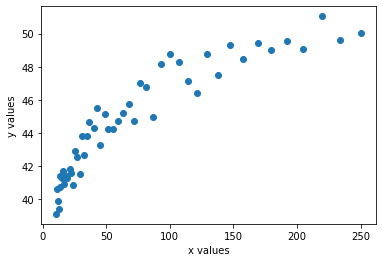

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot data points
plt.scatter(x, y)
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

### Fit the curve, plot it

In [5]:
import numpy as np
import numpy.polynomial.polynomial as poly

coefs = poly.polyfit(np.log(x), y, deg=1)
print("Coefficients:", coefs)

Coefficients: [31.52920122  3.390241  ]


In [6]:
def fit(x, y, deg, xlabel, ylabel, legend):
    # Fit a polynomial
    coefs = poly.polyfit(x, y, deg=deg)

    # Generate a hundred values between min(x) and max(x)
    x_values = np.linspace(min(x), max(x), num=100)

    # Predict y values
    y_values = poly.polyval(x_values, coefs)

    # Plot curve
    plt.scatter(x, y)
    plt.plot(x_values, y_values, c="C3", label=legend)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

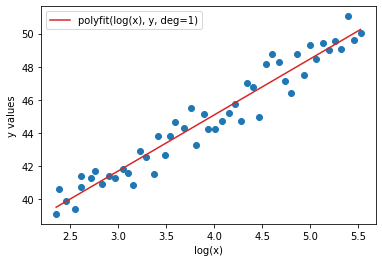

In [7]:
# fit log(x)
fit(np.log(x), y, 1, "log(x)", "y values", "polyfit(log(x), y, deg=1)")

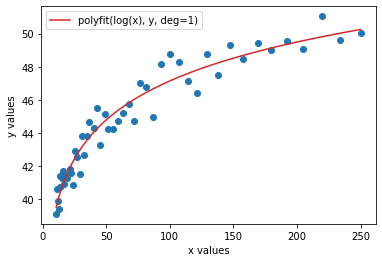

In [8]:
# To plot the model from above with the original scale

# Fit a polynomial
coefs = np.polyfit(np.log(x), y, deg=1)  # log!

# Generate a hundred values between min(x) and max(x)
x_values = np.linspace(x.min(), x.max(), num=100)

# Predict y values
y_values = np.polyval(coefs, np.log(x_values))  # log!

# Plot curve
plt.scatter(x, y)
plt.plot(x_values, y_values, c="C3", label="polyfit(log(x), y, deg=1)")
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.show()

### Compute the RSS and R2 measures

In [9]:
# Compute predictions for each data point
y_pred = np.polyval(coefs, np.log(x))

In [10]:
# Define RSS measure
def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))


# RSS of the baseline
rss_baseline = RSS(y, y.mean())

# Compare
print("RSS baseline:", rss_baseline)
print("RSS value:", RSS(y, y_pred))

RSS baseline: 541.1432872199999
RSS value: 31.84265175275674


In [13]:
# R^2 coefficient
R2 = 1 - (31.84265175275674 / rss_baseline)
print("R^2 coefficient:", R2)

R^2 coefficient: 0.9411567093138287


### Discuss the results, is it a good R<sup>2</sup> score?

_The R<sup>2</sup> is close to 1. This means that the model performs way better than the baseline._

## Task 2
---

The second task consists of fitting a model to a set of data points that contains outliers. The goal is to try and compare different approaches to handle outliers. Use the train/test split methodology (ex. 80-20 splits) and compare the test MAE score for each one of the following approaches

* Fit a linear regression with the outliers
* Fit a huber regression with the outliers
* Fit a linear regression without the outliers

The linear regression without outliers and huber regression models should both perform better than the linear regression with outliers.

---

In [12]:
import pandas as pd

data_df = pd.read_csv("resources/p3_task-2.csv")
data_df.head(2)

,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231


In [13]:
from sklearn.model_selection import train_test_split

# Split into train/test sets
train_df, test_df = train_test_split(
    data_df, train_size=0.8, test_size=0.2, random_state=0
)

print("Train DataFrame:", train_df.shape)
print("Test DataFrame:", test_df.shape)

Train DataFrame: (800, 4)
Test DataFrame: (200, 4)


In [14]:
# Create X/y variables
X_tr = train_df.drop("y", axis=1).values
y_tr = train_df.y.values

X_te = test_df.drop("y", axis=1).values
y_te = test_df.y.values

In [15]:
# Compare models with mean absolute error (MAE)

# Define the MAE cost function
def MAE(y, y_pred):
    return np.median(np.abs(y - y_pred))

### Fit a linear regression with the outliers

In [16]:
# Fit and evaluate a linear regression model with outliers
from sklearn.linear_model import LinearRegression

# Linear regression
lr = LinearRegression()

# Fit the model
lr.fit(X_tr, y_tr)  # Fit to train data

# Print coefficients
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

# Compute predictions
y_pred_lr = lr.predict(X_te)

# Compute MAE
mae_lr = MAE(y_te, y_pred_lr)
print("MAE linear regression: {:.3f}".format(mae_lr))

Coefficients: [ 3.18946219  0.72611244 -0.29586984]
Intercept: 1982.1964160299176
MAE linear regression: 90.185


### Fit a huber regression with the outliers

In [17]:
# Fit and evaluate a Huber loss model with outliers
from sklearn.linear_model import HuberRegressor

# Create the estimator
huber = HuberRegressor(epsilon=1.35)  # threshold of 1.35

# Fit it to X,y
huber.fit(X_tr, y_tr)  # Fit to train data

# Print coefficients
print("Coefficients:", huber.coef_)
print("Intercept:", huber.intercept_)

# Compute predictions
y_pred_huber = huber.predict(X_te)

# Compute MAE
mae_huber = MAE(y_te, y_pred_huber)
print("MAE Huber loss: {:.3f}".format(mae_huber))

Coefficients: [11.70103546  2.21157022 -0.35049232]
Intercept: 1413.3619993264467
MAE Huber loss: 67.483


###  Remove outliers

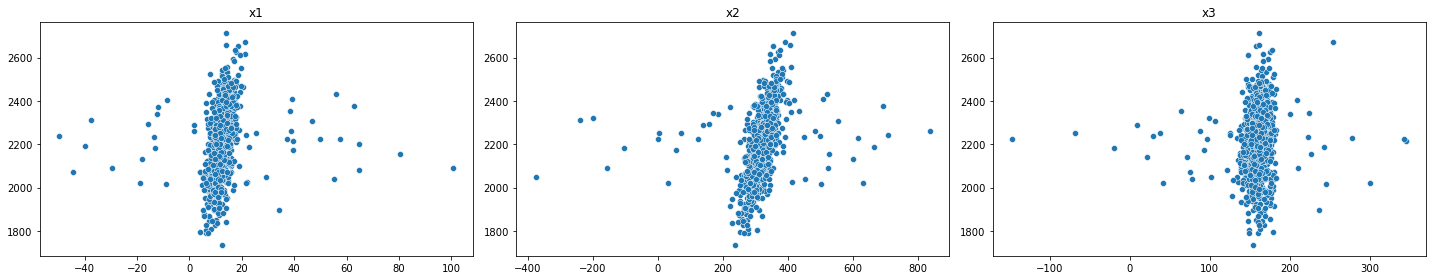

In [18]:
# Plot data points with outliers
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))

sns.scatterplot(x=X_tr[:, 0], y=y_tr, ax=ax1).set_title("x1")
sns.scatterplot(x=X_tr[:, 1], y=y_tr, ax=ax2).set_title("x2")
sns.scatterplot(x=X_tr[:, 2], y=y_tr, ax=ax3).set_title("x3")

plt.tight_layout()
plt.show()

In [19]:
# identify outliers in the training dataset
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_tr)

In [20]:
# select all rows that are not outliers
mask = yhat != -1
X_tr, y_tr = X_tr[mask, :], y_tr[mask]

In [21]:
print(X_tr.shape, y_tr.shape)

(746, 3) (746,)


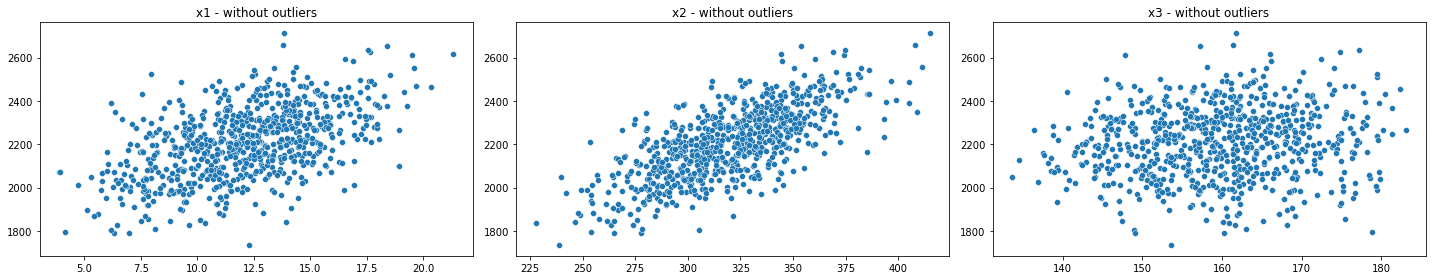

In [22]:
# Plot data points without outliers
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))

sns.scatterplot(x=X_tr[:, 0], y=y_tr, ax=ax1).set_title("x1 - without outliers")
sns.scatterplot(x=X_tr[:, 1], y=y_tr, ax=ax2).set_title("x2 - without outliers")
sns.scatterplot(x=X_tr[:, 2], y=y_tr, ax=ax3).set_title("x3 - without outliers")

plt.tight_layout()
plt.show()

### Fit a linear regression without the outliers

In [23]:
# Fit and evaluate a linear regression model with outliers

# Linear regression
lr_out = LinearRegression()

# Fit the model
lr_out.fit(X_tr, y_tr)  # Fit to train data

# Print coefficients
print("Coefficients:", lr_out.coef_)
print("Intercept:", lr_out.intercept_)

# Compute predictions
y_pred_lr_out = lr_out.predict(X_te)

# Compute MAE
mae_lr_out = MAE(y_te, y_pred_lr_out)
print("MAE linear regression without outliers: {:.3f}".format(mae_lr_out))

Coefficients: [29.60425745  3.88669863  2.58896267]
Intercept: 193.746979886012
MAE linear regression without outliers: 43.853


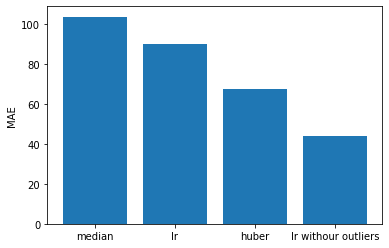

In [24]:
# Compare your models to a baseline using a bar chart

# Create baseline
mae_baseline = MAE(y_te, np.median(y_tr))

# Final comparison
mae_values = [mae_baseline, mae_lr, mae_huber, mae_lr_out]
titles = ["median", "lr", "huber", "lr withour outliers"]

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)

plt.ylabel("MAE")
plt.show()